## polynomial regression

assignment2.csv is the data for you to do analysis on. It is the data to predict cars' prices.
Below is the guideline:
1. Read the data, call it data_original
2. Target = 'price'
3. Fix the features, e.g., features_numerical = \['A', 'B', 'C', 'D'\], features_category=\['E','F'\].
4. Preprocess the data
 - add one-hot encoding for categorical to `data`
 - add polynomial to `data`
5. Fit to model, `model.fit(data.drop[target], data[target])`
6. Predict the model by `data`

$^*$You may use the function `create_poly_feature()` defined as follows to generate the polynomials.

In [357]:
def create_poly_feature(df, feature, degree):
    '''
    :param df: Dataframe, the whole dataframe
    :param feature: string, the feature to create polynomial
    :param degree: int, the degree of the polynomial
    :return:
    '''
    result = pd.DataFrame()
    if feature in df.columns:
        # loop over the degrees:
        for power in range(2,  degree+1): 
            # first we'll give the column a name:
            name = feature + '_power_' + str(power)

            # then assign df[name] to the appropriate power of feature
            result[name] = df[feature].astype(float) ** power
        return result
    else:
        return print("Please select a feature in this df!")

### read the dataset assignment2.csv and answer the following question:
- How many features in this dataset and what are their names?
- Which are categorical features? List their names.

In [358]:
import pandas as pd
data_origin = pd.read_csv('assignment2-1.csv')
target = data_origin['price']

# rwd( rear wheels drive)
# fwd( front wheels drive)
# make (company)
def onehot_encode(df, feature):
    result = pd.DataFrame()
    if feature in df.columns:
        # loop over the degrees:
        result = pd.get_dummies(df, columns=[feature])
        return result
    else:  
        return print("Please select a feature in this df!")

cat_feature_make = onehot_encode(data_origin, 'make')
cat_feature_mnd = onehot_encode(cat_feature_make, 'drive-wheels')
features_num = ['length', 'width', 'height']
features_cat = ['make', 'drive-wheels']
print("There are 6 features, their names are 'make', 'drive-wheels', 'length', 'width', 'height', and 'price'.")
print("Categorical features in the dataset are 'make'and 'drive-wheels' ")
data_origin

There are 6 features, their names are 'make', 'drive-wheels', 'length', 'width', 'height', and 'price'.
Categorical features in the dataset are 'make'and 'drive-wheels' 


,make,drive-wheels,length,width,height,price
0,alfa-romero,rwd,168.8,64.1,48.8,16500
1,alfa-romero,rwd,171.2,65.5,52.4,16500
2,audi,fwd,176.6,66.2,54.3,13950
3,audi,4wd,176.6,66.4,54.3,17450
4,audi,fwd,177.3,66.3,53.1,15250
...,...,...,...,...,...,...
175,volvo,rwd,188.8,67.2,57.5,18950
176,volvo,rwd,188.8,68.9,55.5,16845
177,volvo,rwd,188.8,68.8,55.5,19045
178,volvo,rwd,188.8,68.9,55.5,21485


### add the following features to the original dataset:
- degree of 2 polynomial of `length`$^*$
- degree of 3 polynomial of `height`$^*$

In [359]:
poly_feature_length = create_poly_feature(data_origin, 'length', 2)
poly_feature_height = create_poly_feature(data_origin, 'height', 3)

### consider the whole data set as training set and fit the model.

[-9.60452364e+02  9.73908147e+02 -2.02220364e+04  1.74495521e+03
 -4.94696981e+02  7.89459622e+03 -1.70970023e+03 -2.31839431e+03
 -1.97305751e+03 -4.14061589e+03  8.51413031e+03 -2.91691413e+03
  1.18458241e+04 -1.62485913e+03 -3.03692314e+03 -1.76119502e+03
 -6.04572700e+03 -3.04745840e+03  1.61535353e+04 -5.16160120e+03
 -4.50084489e+02 -3.72066491e+03 -3.38694465e+03 -1.76282286e+03
 -2.60138138e+03  7.99258798e+02 -1.73317854e+03  9.33919740e+02
  3.26372540e+00  3.54757749e+02 -2.09106997e+00]
405375.8759149376


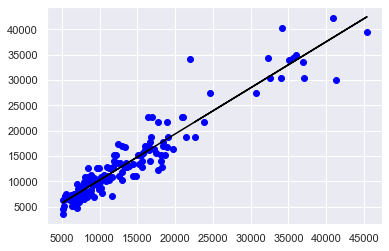

                           Coeff
length               -960.452364
width                 973.908147
height             -20222.036390
make_alfa-romero     1744.955214
make_audi            -494.696981
make_bmw             7894.596224
make_chevrolet      -1709.700228
make_dodge          -2318.394308
make_honda          -1973.057513
make_isuzu          -4140.615889
make_jaguar          8514.130311
make_mazda          -2916.914134
make_mercedes-benz  11845.824149
make_mercury        -1624.859126
make_mitsubishi     -3036.923143
make_nissan         -1761.195023
make_peugot         -6045.726997
make_plymouth       -3047.458397
make_porsche        16153.535331
make_renault        -5161.601199
make_saab            -450.084489
make_subaru         -3720.664907
make_toyota         -3386.944653
make_volkswagen     -1762.822865
make_volvo          -2601.381378
drive-wheels_4wd      799.258798
drive-wheels_fwd    -1733.178538
drive-wheels_rwd      933.919740
length_power_2          3.263725
height_pow

In [360]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
target = ['price']
data_processed = pd.concat([cat_feature_mnd, poly_feature_length, poly_feature_height],axis = 1)
x = data_processed.drop('price',axis=1)
y = data_processed['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9, random_state = 0)
regr = linear_model.LinearRegression()
#regr.fit(x_train, y_train)
regr.fit(x, y)
print(regr.coef_)
print(regr.intercept_)
pd = pd.DataFrame(regr.coef_, x.columns, columns = ['Coeff'])
#pred = regr.predict(x_test)
pred = regr.predict(x)
plt.scatter(y, pred, color="blue")

m, b = np.polyfit(y, pred, 1)
plt.plot(y, m*y + b, color="black")

plt.show()
print(pd)


(array([ 1.,  0.,  3.,  9., 58., 83., 20.,  5.,  0.,  1.]),
 array([-12172.41059996,  -9829.13680035,  -7485.86300075,  -5142.58920115,
         -2799.31540155,   -456.04160195,   1887.23219765,   4230.50599726,
          6573.77979686,   8917.05359646,  11260.32739606]),
 <BarContainer object of 10 artists>)

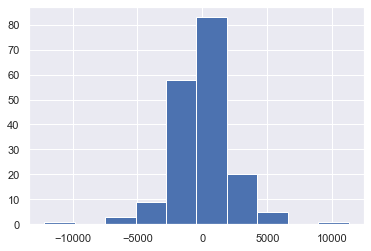

In [361]:
plt.hist(y - predictions)

### write down the formula of RMSE and compute its value of this model. 

- Hint: you can use $y_i$ as the value of i-th target and $\hat{y}_i$ as the i-th predicted target.

The formula of RMSE:

RMSE = $\sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(y_i -\hat{y}_i)^2}} $


In [362]:
import math
RMSE = np.sqrt(metrics.mean_squared_error(y, pred))
print("Root Mean Square Error: ", RMSE)

Root Mean Square Error:  2392.4540709679427


### compute the following user-defined metric of this model: 

- $loss = \sum_{i} |y_i -\hat{y}_i |$, where $y_i$ is the value of i-th target and $\hat{y}_i$ is the i-th predicted target.

In [363]:
loss = np.sum(abs(np.subtract(y, pred)))
print("loss: ", loss)

loss:  292778.9744982414
